In [4]:
import os
import sys

sys.path.append('../')

from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from rdkit.Chem import AllChem


from src.utils.constants import HOME_DIR, DATA_DIR

In [5]:
data_path = os.path.join(DATA_DIR, 'clean_data.csv')
data = pd.read_csv(data_path)

In [6]:
data

,Canonical_SMILES,LD50_mgkg
0,O=[N+]([O-])c1ccc(Cl)cc1,460.00
1,Nc1ccc([N+](=O)[O-])cc1,750.00
2,O=[N+]([O-])c1ccc(O)cc1,170.00
3,O=[N+]([O-])c1ccc(CCl)cc1,1809.00
4,COc1ccc([N+](=O)[O-])cc1,2300.00
...,...,...
5301,CCO[PH](=S)OCC,200.00
5302,CCCSP(C)SCCC,2.24
5303,C=CC(=O)OCC(C)O,250.00
5304,C[N+](C)(C)CCCl,600.00


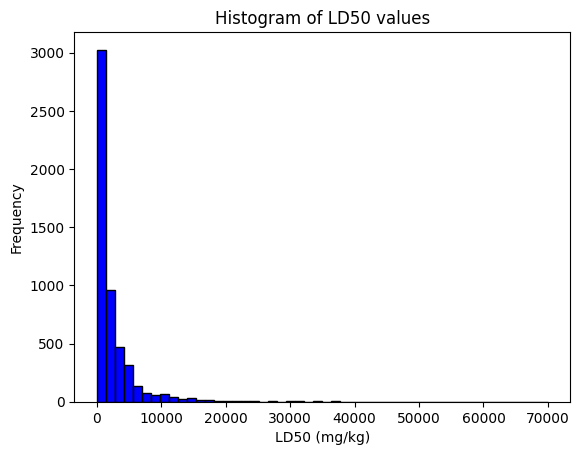

In [9]:
LD50 = data['LD50_mgkg']

# Plot the histogram of the LD50 values
plt.hist(LD50, bins=50, color='blue', edgecolor='black')
plt.xlabel('LD50 (mg/kg)')
plt.ylabel('Frequency')
plt.title('Histogram of LD50 values')
plt.show()

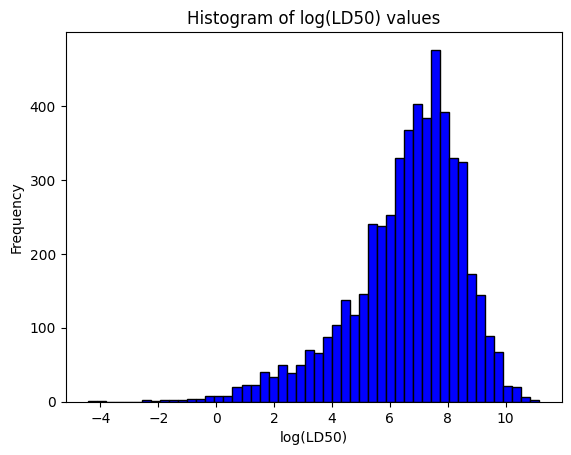

In [10]:
ln_LD50 = np.log(data['LD50_mgkg'])

# Plot the histogram of the LD50 values
plt.hist(ln_LD50, bins=50, color='blue', edgecolor='black')
plt.xlabel('log(LD50)')
plt.ylabel('Frequency')
plt.title('Histogram of log(LD50) values')
plt.show()

In [3]:
Canonical_QSARr = data['Canonical_QSARr']
atom_counts = defaultdict(int)

mols = [AllChem.AddHs(AllChem.MolFromSmiles(smile)) for smile in Canonical_QSARr]

for mol in mols:
    for atom in mol.GetAtoms():
        atom_counts[atom.GetSymbol()] += 1

NameError: name 'data' is not defined

In [17]:
atom_counts.keys()

dict_keys(['O', 'N', 'C', 'Cl', 'H', 'S', 'B', 'Si', 'P', 'F', 'Br', 'Se', 'I'])

In [18]:
# Turn atom names to atomic numbers
atom_numbers = {atom: AllChem.GetPeriodicTable().GetAtomicNumber(atom) for atom in atom_counts.keys()}

In [23]:
nums = list(atom_numbers.values())
nums.sort()
nums

[1, 5, 6, 7, 8, 9, 14, 15, 16, 17, 34, 35, 53]